In [7]:
import create_model_pyswarm
import numpy as np
import matplotlib.pyplot as plt
# Change simulation parameters here
temperature = 25  # in degC, valid values: 0, 10, 25
crate = 1         # valid values: 0.5, 1, 2
cells_ignore = ["790","791","792"]   # cells to ignore, in this case we ignore cell 791 because the data for that cell is faulty

In [8]:
model=create_model_pyswarm.model_build(temperature,crate,cells_ignore)
x0 =np.array([5e-14,6.48e-7,20,2.85e3])
# Create bounds
max_bound = np.array([ 2.06e-12, 2.18589831e-5,1000,2.85e6])
min_bound = np.array([ 2.06e-16, 2.18589831e-9,0.1,2.85])
bounds = (min_bound, max_bound) #bounds of the variable optimized
#model.fitness(x0) #initial value of the function

In [9]:
%%time
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Set-up hyperparameters
options = {'c1': 2.5, 'c2': 0.5, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=4, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(model.fitness, iters=1000)

2022-03-25 14:40:48,756 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 2.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best:  32%|███▏      |319/1000, best_cost=0.03712022-03-25 14:45:26,775 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:45:26,846 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
pyswarms.single.global_best:  34%|███▍      |339/1000, best_cost=0.03712022-03-25 14:45:43,939 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:45:44,014 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
pyswarms.single.global_best:  57%|█████▋    |573/1000, best_cost=0.037 2022-03-25 14:49:07,345 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:49:07,419 - pybamm.logger - WARNING - Calling variable outside interpolation range 

CPU times: total: 14min 31s
Wall time: 14min 31s


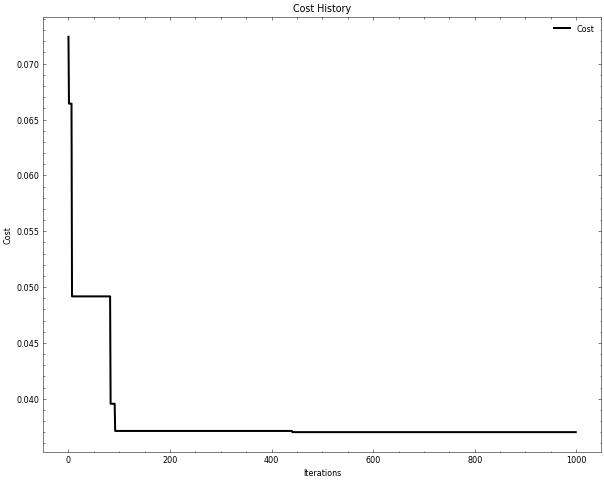

In [10]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

Optimized values are: [1.63950825e-14 2.83444562e-06 5.03086059e+02 1.95770297e+06]


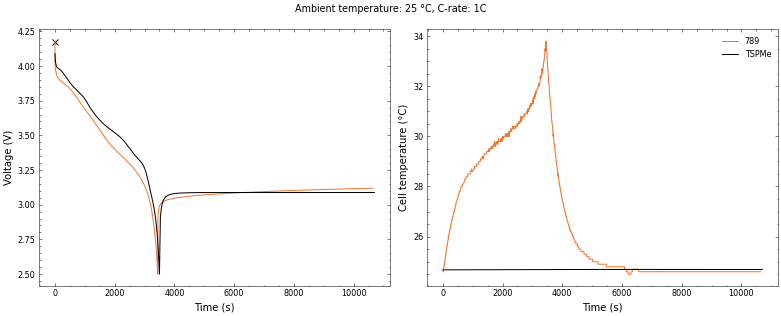

In [11]:
#print("Initial function value: %s" %model.fitness(x0))

#print("Optimized function value: %s" %model.fitness(pos))

print("Optimized values are: %s" %pos)

model.define_model(pos)

model.model_plot()